# Iris Classification
Learn classification problem using Iris data set!

## 1. Import Libraries & Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# check versions of libraries used. 
print("Pandas version: {}".format(pd.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("seaborn version: {}".format(sns.__version__))

Pandas version: 2.3.1
matplotlib version: 3.10.5
seaborn version: 0.13.2


In [2]:
# import Data
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() #no null values in this data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


This dataset has no null values. it has 6 columns (id is not needed as row no. = id so we will drop it). Sepal and petal length/width are all right dtype (float) and species (species of iris) is object but can calso be categorical data. 

In [5]:
# remove Id Column as we already have row index
df= df.drop('Id', axis = 1) 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sepal leafs are longer and wider compared to petal leafs

In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

There are 3 species of Iris in this dataset and for each species, there are exactly 50 data.
This is very clean and balanaced data. 
The balanced no. of species allow classification models easier to perform  as ml algorithms are designed around the assumption of an equal no. of examples for each class. 

## 2. Data Visualisation and EDA

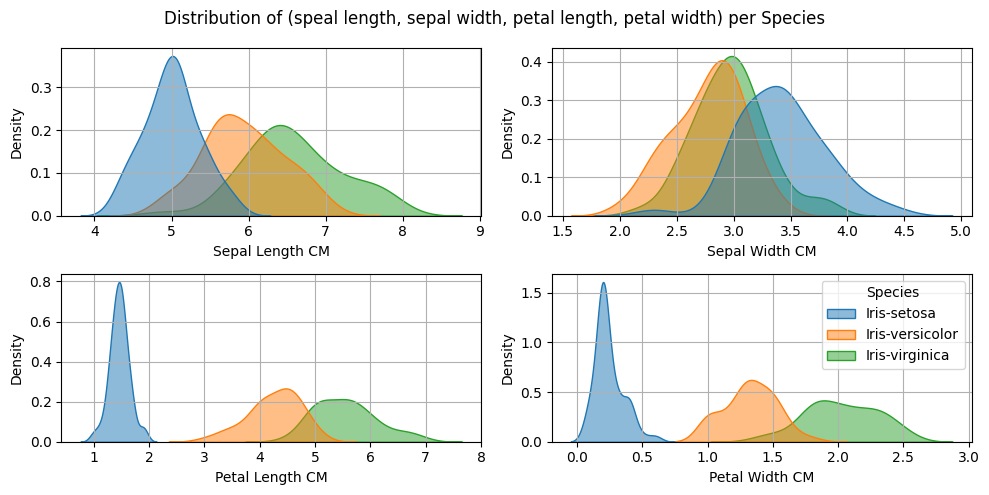

In [51]:
fig, axes = plt.subplots(2,2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (speal length, sepal width, petal length, petal width) per Species')

# Distribution of sepal length per species
sns.kdeplot(ax = axes[0,0], data = df, x = 'SepalLengthCm', hue = 'Species', alpha = 0.5, shade = True)
axes[0,0].set_xlabel('Sepal Length CM')
axes[0,0].get_legend().remove()
axes[0,0].grid(True) 

# Distirbution of sepal width per Species
sns.kdeplot(ax = axes[0,1], data = df, x = 'SepalWidthCm', hue = 'Species', alpha = 0.5, shade = True)
axes[0,1].set_xlabel('Sepal Width CM')
axes[0,1].get_legend().remove()
axes[0,1].grid(True) 


# Distirbution of petal length  per Species
sns.kdeplot(ax = axes[1,0], data = df, x = 'PetalLengthCm', hue = 'Species', alpha = 0.5, shade = True)
axes[1,0].set_xlabel('Petal Length CM')
axes[1,0].get_legend().remove()
axes[1,0].grid(True) 


# Distirbution of sepal width per Species
sns.kdeplot(ax = axes[1,1], data = df, x = 'PetalWidthCm', hue = 'Species', alpha = 0.5, shade = True)
axes[1,1].set_xlabel('Petal Width CM')
#axes[1,1].get_legend().remove()
axes[1,1].grid(True) 


plt.tight_layout()

Iris-setosa (blue) is more distinct compared to other species. Petal length and width is better identifier compared to sepal length and width for classification as they dont overlap as much. (Setosa doesnt overlap)
Now that we know the distribution of length and width per species and new found insight on distinct-ness of petals, let us plot Length vs Width per species.

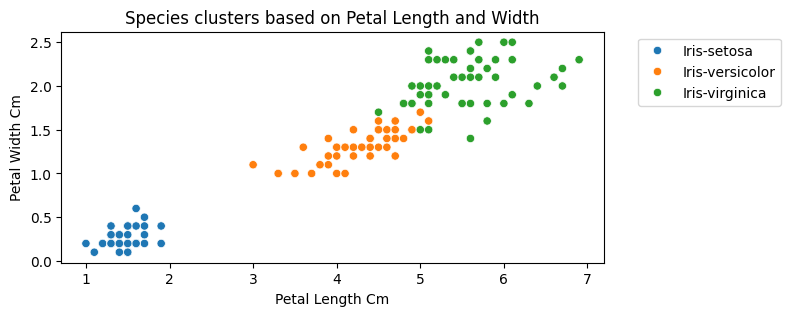

In [63]:
# scatter plot of petal length vs petal width
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')
plt.title('Species clusters based on Petal Length and Width')
plt.xlabel('Petal Length Cm')
plt.ylabel('Petal Width Cm')
plt.legend(bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.show()

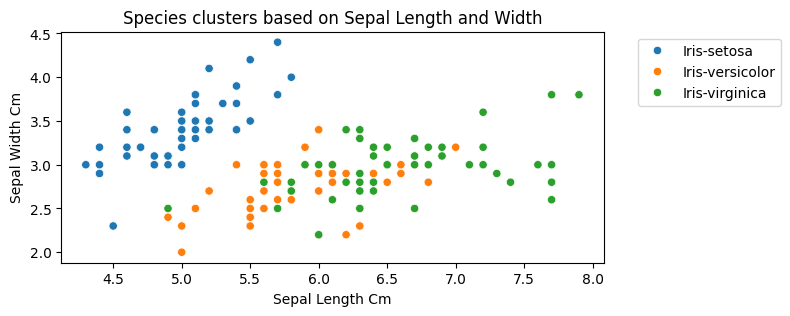

In [64]:
# to double check lets plot sepal length vs width 
# scatter plot of petal length vs petal width
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')
plt.title('Species clusters based on Sepal Length and Width')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.legend(bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.show()

The scatter plot of petal lengh vs width shows that again setosa is distributed between 1-2cm length and 0-1cm in width.  Iris-versicolor is 3-5.2 length and 1-2cm width. Iris-virginica is 4.5-7cm and 1.5-2.5cm width. You can clearly see sertosa doesnt overlap with other species but versicolor and virginica does. 
However comparing based on sepal width and length, all the data overlap each other and therefore again proves petal is better predictor. 

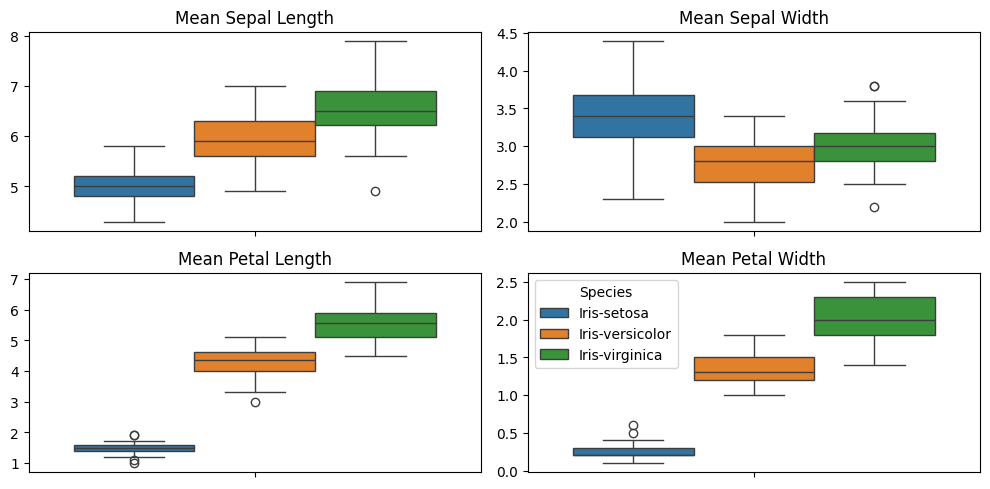

In [65]:
# plot boxplots to see distribution for each sepal/petal length/width
fig,axes = plt.subplots(2,2, figsize = (10,5), dpi = 100)
 #mean sepal length
sns.boxplot(ax = axes[0,0], data = df, hue = 'Species', y = 'SepalLengthCm')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title('Mean Sepal Length')
axes[0,0].get_legend().remove()


 #mean sepal width
sns.boxplot(ax = axes[0,1], data = df, hue = 'Species', y = 'SepalWidthCm')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title('Mean Sepal Width')
axes[0,1].get_legend().remove()


sns.boxplot(ax = axes[1,0], data = df, hue = 'Species', y = 'PetalLengthCm')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title('Mean Petal Length')
axes[1,0].get_legend().remove()


 #mean sepal width
sns.boxplot(ax = axes[1,1], data = df, hue = 'Species', y = 'PetalWidthCm')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title('Mean Petal Width')
plt.tight_layout()

Iris-setosa is easily separable from the other species as its clearly outside other two iris sepal and petal length and width.
Petal length and width have IQR separate from each other (doesnt overlap) therefore is better predictor.

All 3 types of plots (kde, scatter, and boxplot all confirm petal is better predictor and setosa is more unique/different compared to other species

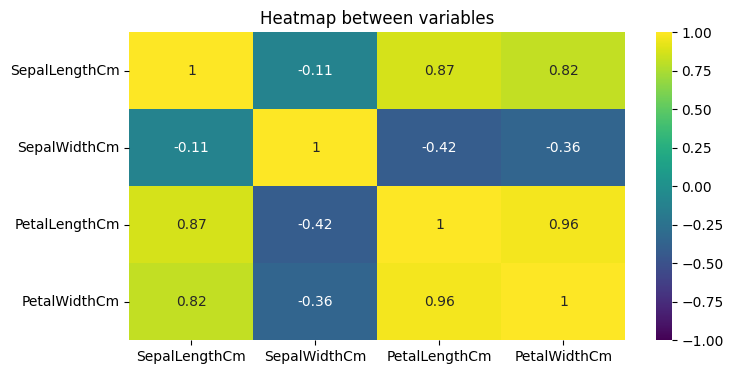

In [66]:
# correlation map
plt.figure(figsize = (8,4), dpi = 100)
sns.heatmap(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr(), annot = True, cmap = 'viridis', vmin = -1, vmax = 1)
plt.title('Heatmap between variables')
plt.show()

## 3. Feature engineering: data prep for the model!
1. separate the dependent variable from the independent ones
2. perform a train test split
3. scale the data

In [67]:
# 1. separate the dependent variable from the independent ones.
X = df.drop('Species', axis = 1)
y = df['Species']

In [70]:
# 2. train test split using sckit-learn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [72]:
# 3. Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # setup scaler
Scaled_X_train = scaler.fit_transform(X_train) # fit data to scaler 
Scaled_X_test = scaler.transform(X_test) # apply scaler model from train set on to test set


## 4. Model building. 
we will use logestic regression 

In [73]:
# logestic Regression 
from sklearn.linear_model import LogisticRegression
# import the classifier
log_model = LogisticRegression() # initate the model
log_model.fit(Scaled_X_train, y_train) # fit the model


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [74]:
# lets predict on test data set
y_pred = log_model.predict(Scaled_X_test)

In [75]:
# import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

Confusion matrix a summary of prediction results on a classification platform 
matrix: positive negative matrix that shows true positive, false positive, false negative and true negatrive 
 
</br>

classification report: measure the quality of predictions from a classification algortithm. How many predictions are true and false. The report shows the main classification **metrics precision, recall and f1-score** on a per-class basis
</br>
-**Precision**: What percent of your predictions were correct?</br>
-**Recall**: What percent of the positive cases did you catch?</br>
-**F1 Score**: what percent of positive predictions were correct?</br>

In [76]:
# create the confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

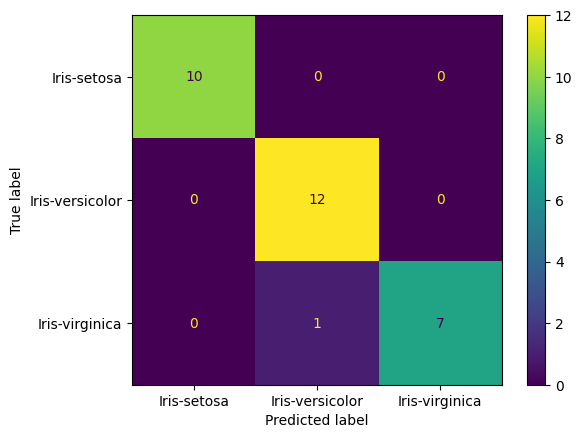

In [77]:
#fig, ax = plt.subplots(dpi = 120)
#ConfusionMatrixDisplay(log_model, Scaled_X_test, y_test, ax = ax)
disp = ConfusionMatrixDisplay.from_estimator(log_model, Scaled_X_test, y_test)
#disp.plot()
plt.show()

In [78]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score,2)

0.97

In [79]:
# generate the classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



As expected Setosa had best prediction with 100% precision and 100% recall (both Precision: the proportion of all the model's positive classifications that are actually positive and recall: true positive rate). Whereas versicolor had 92% but had 100% true positive rate)



In [80]:
classification_report(y_test, y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       0.92      1.00      0.96        12\n Iris-virginica       1.00      0.88      0.93         8\n\n       accuracy                           0.97        30\n      macro avg       0.97      0.96      0.96        30\n   weighted avg       0.97      0.97      0.97        30\n'

## 5. Model optimisation: hyper parameter tuning



In [81]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# set the range of parameters
penalty = ['l1','l2','elasticnet'] 
C = np.logspace(0,20,50)
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
multi_class = ['ovr','multinomial']
l1_ratio = np.linspace(0,1,20)

# build the parameter grid
param_grid = {
    'penalty': penalty,
    'C':C,
    'solver':solver,
    'multi_class':multi_class,
    'l1_ratio':l1_ratio}
# initiate and fit the grid search model
grid_model = GridSearchCV(log_model, param_grid = param_grid)
grid_model.fit(Scaled_X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+20]), 'l1_ratio': array([0. ..., 1. ]), 'multi_class': ['ovr', 'multinomial'], 'penalty': ['l1', 'l2', ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


### 5.1. GridSearch
GridSearchCV function is exhaustive search over specified paramter values for an estimator.<br>
#### 5.1.1 Penalty
**l1 (Lasso regularization):** Adds a penalty proportional to the absolute value of the coefficients. This can lead to sparse models where some coefficients are driven to zero, effectively performing feature selection <br>
**l2 (Ridge regularization):** Adds a penalty proportional to the square of the magnitude of the coefficients. This ahelps to shrink coefficients and reduce their variance, but typically does not lead to sparsity. <br>
**elasticnet:** A combination of l1 and l2 penalties. It can be useful when there are correlated features.
#### 5.1.2. Gridspace
**C:** A parameter that adjusts the strength of regularization.
#### 5.1.3. solver
**Newton-cg**: applies (linear) conjugate gradient (CG) method to second-order Taylor-series approximation of f around the current iterate xk.
**lbfgs:** Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is a popular optimization algorithm used in machine learning and other fields to solve minimization problems
**liblinear:** pplies L1 regularization
**Sag:** Stochastic Average Gradient 
**Saga:** improved sag 

In [83]:
# best parameters
grid_model.best_params_

{'C': np.float64(16.768329368110084),
 'l1_ratio': np.float64(0.0),
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'solver': 'saga'}

Model re-evaluation
we will evaluate the optimized version of our model and see if it does better than the base model

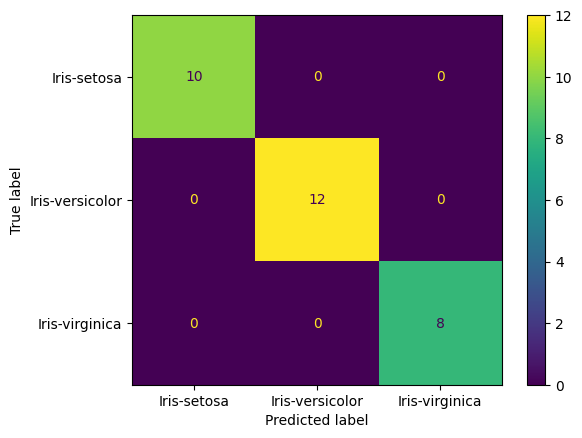

In [84]:
# creating predictions
y_pred = grid_model.predict(Scaled_X_test)
# plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(grid_model, Scaled_X_test, y_test)
#disp.plot()
plt.show()

In [85]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

1.0

In [86]:
# generate the classification report
print(classification_report(y_test, y_pred)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



New hypertunned model did a completely perfect job. It correctly classified all the examples in the test data. The accuracy of the model is 100 percent which improved from 97% previous model. 

## 6. Conclusion

This exercise was to apply classification logistic regression model to perfect iris dataset. The aim was to learn simple classification problem and apply hyper paramter tunning techniques to improve model accuracy. Using gridsearchCV, the best paramaters were: {'C': np.float64(16.768329368110084),
 'l1_ratio': np.float64(0.0), 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'} and gave accuracy of 100%.
 